In [14]:
import PIL
from PIL import Image 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
import numpy as np 
import pandas as pd 
import sklearn as sk 

  
print('Installed Pillow Version:', PIL.__version__)

Installed Pillow Version: 8.0.1


In [10]:
# load image as PIL Image object

test_img = load_img("/Users/johnfunk/OneDrive - Eastern Connecticut State University/Courses/Computer Science/Senior-Research/github-project/senior_research/data/Car/Car (1).png")
print(type(test_img)) 
print(test_img.format) 
print(test_img.mode) 
print(test_img.size) 

<class 'PIL.Image.Image'>
None
RGB
(120, 120)


In [13]:
test_converted_img = img_to_array(test_img)

# <class 'numpy.ndarray'> 
print(type(test_converted_img)) 
  
# type: float32 
print("type:", test_converted_img.dtype) 
  
# shape: (200, 400, 3) 
print("shape:", test_converted_img.shape) 

<class 'numpy.ndarray'>
type: float32
shape: (120, 120, 3)


In [59]:
import os

classes = ['car', 'hydrant', 'crosswalk', 'traffic light']

images = []
labels = []

i = 0
directory_cars = r'/Users/johnfunk/OneDrive - Eastern Connecticut State University/Courses/Computer Science/Senior-Research/github-project/senior_research/data/Car'
directory_crosswalk = r'/Users/johnfunk/OneDrive - Eastern Connecticut State University/Courses/Computer Science/Senior-Research/github-project/senior_research/data/Crosswalk'
directory_hydrant = r'/Users/johnfunk/OneDrive - Eastern Connecticut State University/Courses/Computer Science/Senior-Research/github-project/senior_research/data/Hydrant'
directory_traffic = r'/Users/johnfunk/OneDrive - Eastern Connecticut State University/Courses/Computer Science/Senior-Research/github-project/senior_research/data/TrafficLight'

# convert 1000 images of cars to numpy arrays
for entry in os.scandir(directory_cars):
    if i == 1000:
        i = 0
        break
    if (entry.path.endswith(".jpg") or entry.path.endswith(".png")) and entry.is_file():
        img = load_img(entry.path)
        converted = img_to_array(img)
        images.append(converted)
        labels.append(0)
        print(i, " [Cars] conversion successful")
        i += 1


# convert 1000 images of crosswalks to numpy arrays
for entry in os.scandir(directory_crosswalk):
    if i == 1000:
        i = 0
        break
    if (entry.path.endswith(".jpg") or entry.path.endswith(".png")) and entry.is_file():
        img = load_img(entry.path)
        converted = img_to_array(img)
        images.append(converted)
        labels.append(2)
        print(i, " [Crosswalk] conversion successful")
        i += 1


# convert all images of hydrants to numpy arrays
for entry in os.scandir(directory_hydrant):
    if (entry.path.endswith(".jpg") or entry.path.endswith(".png")) and entry.is_file():
        img = load_img(entry.path)
        converted = img_to_array(img)
        images.append(converted)
        labels.append(1)
        print(i, " [Hydrant] conversion successful")
        i += 1


i = 0
# convert all images of hydrants to numpy arrays
for entry in os.scandir(directory_traffic):
    if (entry.path.endswith(".jpg") or entry.path.endswith(".png")) and entry.is_file():
        img = load_img(entry.path)
        converted = img_to_array(img)
        images.append(converted)
        labels.append(3)
        print(i, " [TrafficLight] conversion successful")
        i += 1


sful
1318  [TrafficLight] conversion successful
1319  [TrafficLight] conversion successful
1320  [TrafficLight] conversion successful
1321  [TrafficLight] conversion successful
1322  [TrafficLight] conversion successful
1323  [TrafficLight] conversion successful
1324  [TrafficLight] conversion successful
1325  [TrafficLight] conversion successful
1326  [TrafficLight] conversion successful
1327  [TrafficLight] conversion successful
1328  [TrafficLight] conversion successful
1329  [TrafficLight] conversion successful
1330  [TrafficLight] conversion successful
1331  [TrafficLight] conversion successful
1332  [TrafficLight] conversion successful
1333  [TrafficLight] conversion successful
1334  [TrafficLight] conversion successful
1335  [TrafficLight] conversion successful
1336  [TrafficLight] conversion successful
1337  [TrafficLight] conversion successful
1338  [TrafficLight] conversion successful
1339  [TrafficLight] conversion successful
1340  [TrafficLight] conversion successful
1341  

In [128]:
images = np.asarray(images)
labels = np.asarray(labels)
print(images.shape)
print(images[0].shape)
print(labels.shape)

(3783,)
(120, 120, 3)
(3783,)


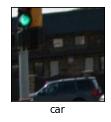

In [130]:
images2 = images / 255.0 # greyscale images

# this code block removes the 3rd dimension from the image
# test = images[0][:,:,0]
# print(test.shape)
# plt.figure(figsize=(10,10))
# plt.subplot(5,5,i+1)
# plt.xticks([])
# plt.yticks([])
# plt.grid(False)
# plt.imshow(test, cmap=plt.cm.binary)
# plt.xlabel(classes[0])
# plt.show()


print(images2.shape)
print(images2[0].shape)

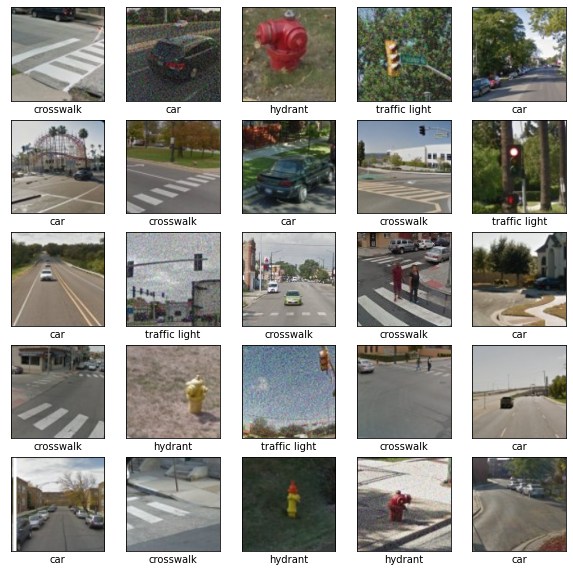

In [112]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images2, labels, test_size=0.2, random_state=32)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()